# 🦸🏻‍♀️ **Supercon Dataset**
The SuperCon dataset was created by the National Institute for Materials Science (NIMS) in Japan in 1987, with the goal of compiling information on the composition, structure, and properties of a wide range of superconducting materials. The data was primarily extracted from scientific publications and is now publicly available through the Materials Data Repository (MDR) under the name [MDR SuperCon Datasheet](https://doi.org/10.48505/nims.3837). In this work, however, we use a version of the dataset obtained from [Kaggle](https://www.kaggle.com/datasets/chaozhuang/supercon-dataset), which has been preprocessed and cleaned, resulting in the file ```featurized.csv```. This processed dataset contains approximately 16,000 entries and more than 140 features.
***

### 📚 **Importing libraries**

In [1]:
import os
import zipfile
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt
from pathlib import Path

import optuna

###  ⚙️ **Loading the data**

The dataset was downloaded by the Kaggle API and, from zip data, it will be used the ``featurized.csv`` file.

In [2]:
#!kaggle datasets download -d chaozhuang/supercon-dataset

In [3]:
with zipfile.ZipFile("supercon-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("../data/supercon_data")
os.listdir("../data/supercon_data")

['TC089.png',
 'raw.tsv',
 'TC090.png',
 'TC105.png',
 'TC102.png',
 'featurized.csv',
 'TC071.png']

In [4]:
df = pd.read_csv("../data/supercon_data/featurized.csv").dropna()
display(df)

,formula,Tc,composition,category,0-norm,2-norm,3-norm,5-norm,7-norm,10-norm,...,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,avg s valence electrons,avg p valence electrons,avg d valence electrons,avg f valence electrons,compound possible,max ionic char,avg ionic char,transition metal fraction
0,Ag0.002Al0.998,1.128,Ag0.002 Al0.998,Other,2,0.998002,0.998000,0.998000,0.998000,0.998000,...,0.00000,225.0,1.998,0.998,0.020,0.00,False,0.025275,0.000050,0.002
1,Ag0.005Zn0.995,0.763,Ag0.005 Zn0.995,Other,2,0.995013,0.995000,0.995000,0.995000,0.995000,...,0.30845,194.0,1.995,0.000,10.000,0.00,False,0.019409,0.000097,0.005
2,Ag0.035Cd0.01Sn0.955,3.650,Ag0.035 Cd0.01 Sn0.955,Other,3,0.955693,0.955016,0.955000,0.955000,0.955000,...,6.62770,141.0,1.965,1.910,10.000,0.00,False,0.018060,0.000185,0.035
3,Ag0.03Tl0.97,2.670,Ag0.03 Tl0.97,Other,2,0.970464,0.970010,0.970000,0.970000,0.970000,...,1.80420,194.0,1.970,0.970,10.000,13.58,False,0.023739,0.000691,0.030
4,Ag0.05Rh0.04Ti0.91,1.950,Ag0.05 Rh0.04 Ti0.91,Other,3,0.912250,0.910076,0.910000,0.910000,0.910000,...,5.07780,194.0,1.910,0.000,2.640,0.00,False,0.127943,0.006415,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16516,Zr5Ge2Pt1,3.500,Zr5 Ge2 Pt1,Other,3,0.684653,0.639654,0.626314,0.625147,0.625007,...,14.53125,194.0,1.875,0.500,4.875,1.75,False,0.201983,0.033402,0.125
16517,Zr62.4Ti15.6Ni22,3.215,Zr62.4 Ti15.6 Ni22,Other,3,0.679788,0.636128,0.624800,0.624066,0.624002,...,10.63920,194.0,2.000,0.000,3.320,0.00,False,0.080661,0.013295,0.376
16518,Zr66.3Ti11.7Ni22,3.560,Zr66.3 Ti11.7 Ni22,Other,3,0.708278,0.672162,0.663555,0.663042,0.663001,...,10.63920,194.0,2.000,0.000,3.320,0.00,False,0.080661,0.013482,0.337
16519,Zr70.2Ti7.8Ni22,3.320,Zr70.2 Ti7.8 Ni22,Other,3,0.739789,0.709444,0.702426,0.702030,0.702001,...,10.63920,194.0,2.000,0.000,3.320,0.00,False,0.080661,0.013635,0.298


For training the model, only the numerical features will be used, which were stored in "df_filtered" dataframe.

In [5]:
df_filtered = df.select_dtypes(include=["float64"])
df_filtered

,Tc,2-norm,3-norm,5-norm,7-norm,10-norm,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,...,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,avg s valence electrons,avg p valence electrons,avg d valence electrons,avg f valence electrons,max ionic char,avg ionic char,transition metal fraction
0,1.128,0.998002,0.998000,0.998000,0.998000,0.998000,13.0,47.0,34.0,13.068,...,225.000,0.00000,225.0,1.998,0.998,0.020,0.00,0.025275,0.000050,0.002
1,0.763,0.995013,0.995000,0.995000,0.995000,0.995000,30.0,47.0,17.0,30.085,...,194.155,0.30845,194.0,1.995,0.000,10.000,0.00,0.019409,0.000097,0.005
2,3.650,0.955693,0.955016,0.955000,0.955000,0.955000,47.0,50.0,3.0,49.875,...,144.470,6.62770,141.0,1.965,1.910,10.000,0.00,0.018060,0.000185,0.035
3,2.670,0.970464,0.970010,0.970000,0.970000,0.970000,47.0,81.0,34.0,79.980,...,194.930,1.80420,194.0,1.970,0.970,10.000,13.58,0.023739,0.000691,0.030
4,1.950,0.912250,0.910076,0.910000,0.910000,0.910000,22.0,47.0,25.0,24.170,...,196.790,5.07780,194.0,1.910,0.000,2.640,0.00,0.127943,0.006415,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16516,3.500,0.684653,0.639654,0.626314,0.625147,0.625007,32.0,78.0,46.0,42.750,...,205.625,14.53125,194.0,1.875,0.500,4.875,1.75,0.201983,0.033402,0.125
16517,3.215,0.679788,0.636128,0.624800,0.624066,0.624002,22.0,40.0,18.0,34.552,...,200.820,10.63920,194.0,2.000,0.000,3.320,0.00,0.080661,0.013295,0.376
16518,3.560,0.708278,0.672162,0.663555,0.663042,0.663001,22.0,40.0,18.0,35.254,...,200.820,10.63920,194.0,2.000,0.000,3.320,0.00,0.080661,0.013482,0.337
16519,3.320,0.739789,0.709444,0.702426,0.702030,0.702001,22.0,40.0,18.0,35.956,...,200.820,10.63920,194.0,2.000,0.000,3.320,0.00,0.080661,0.013635,0.298


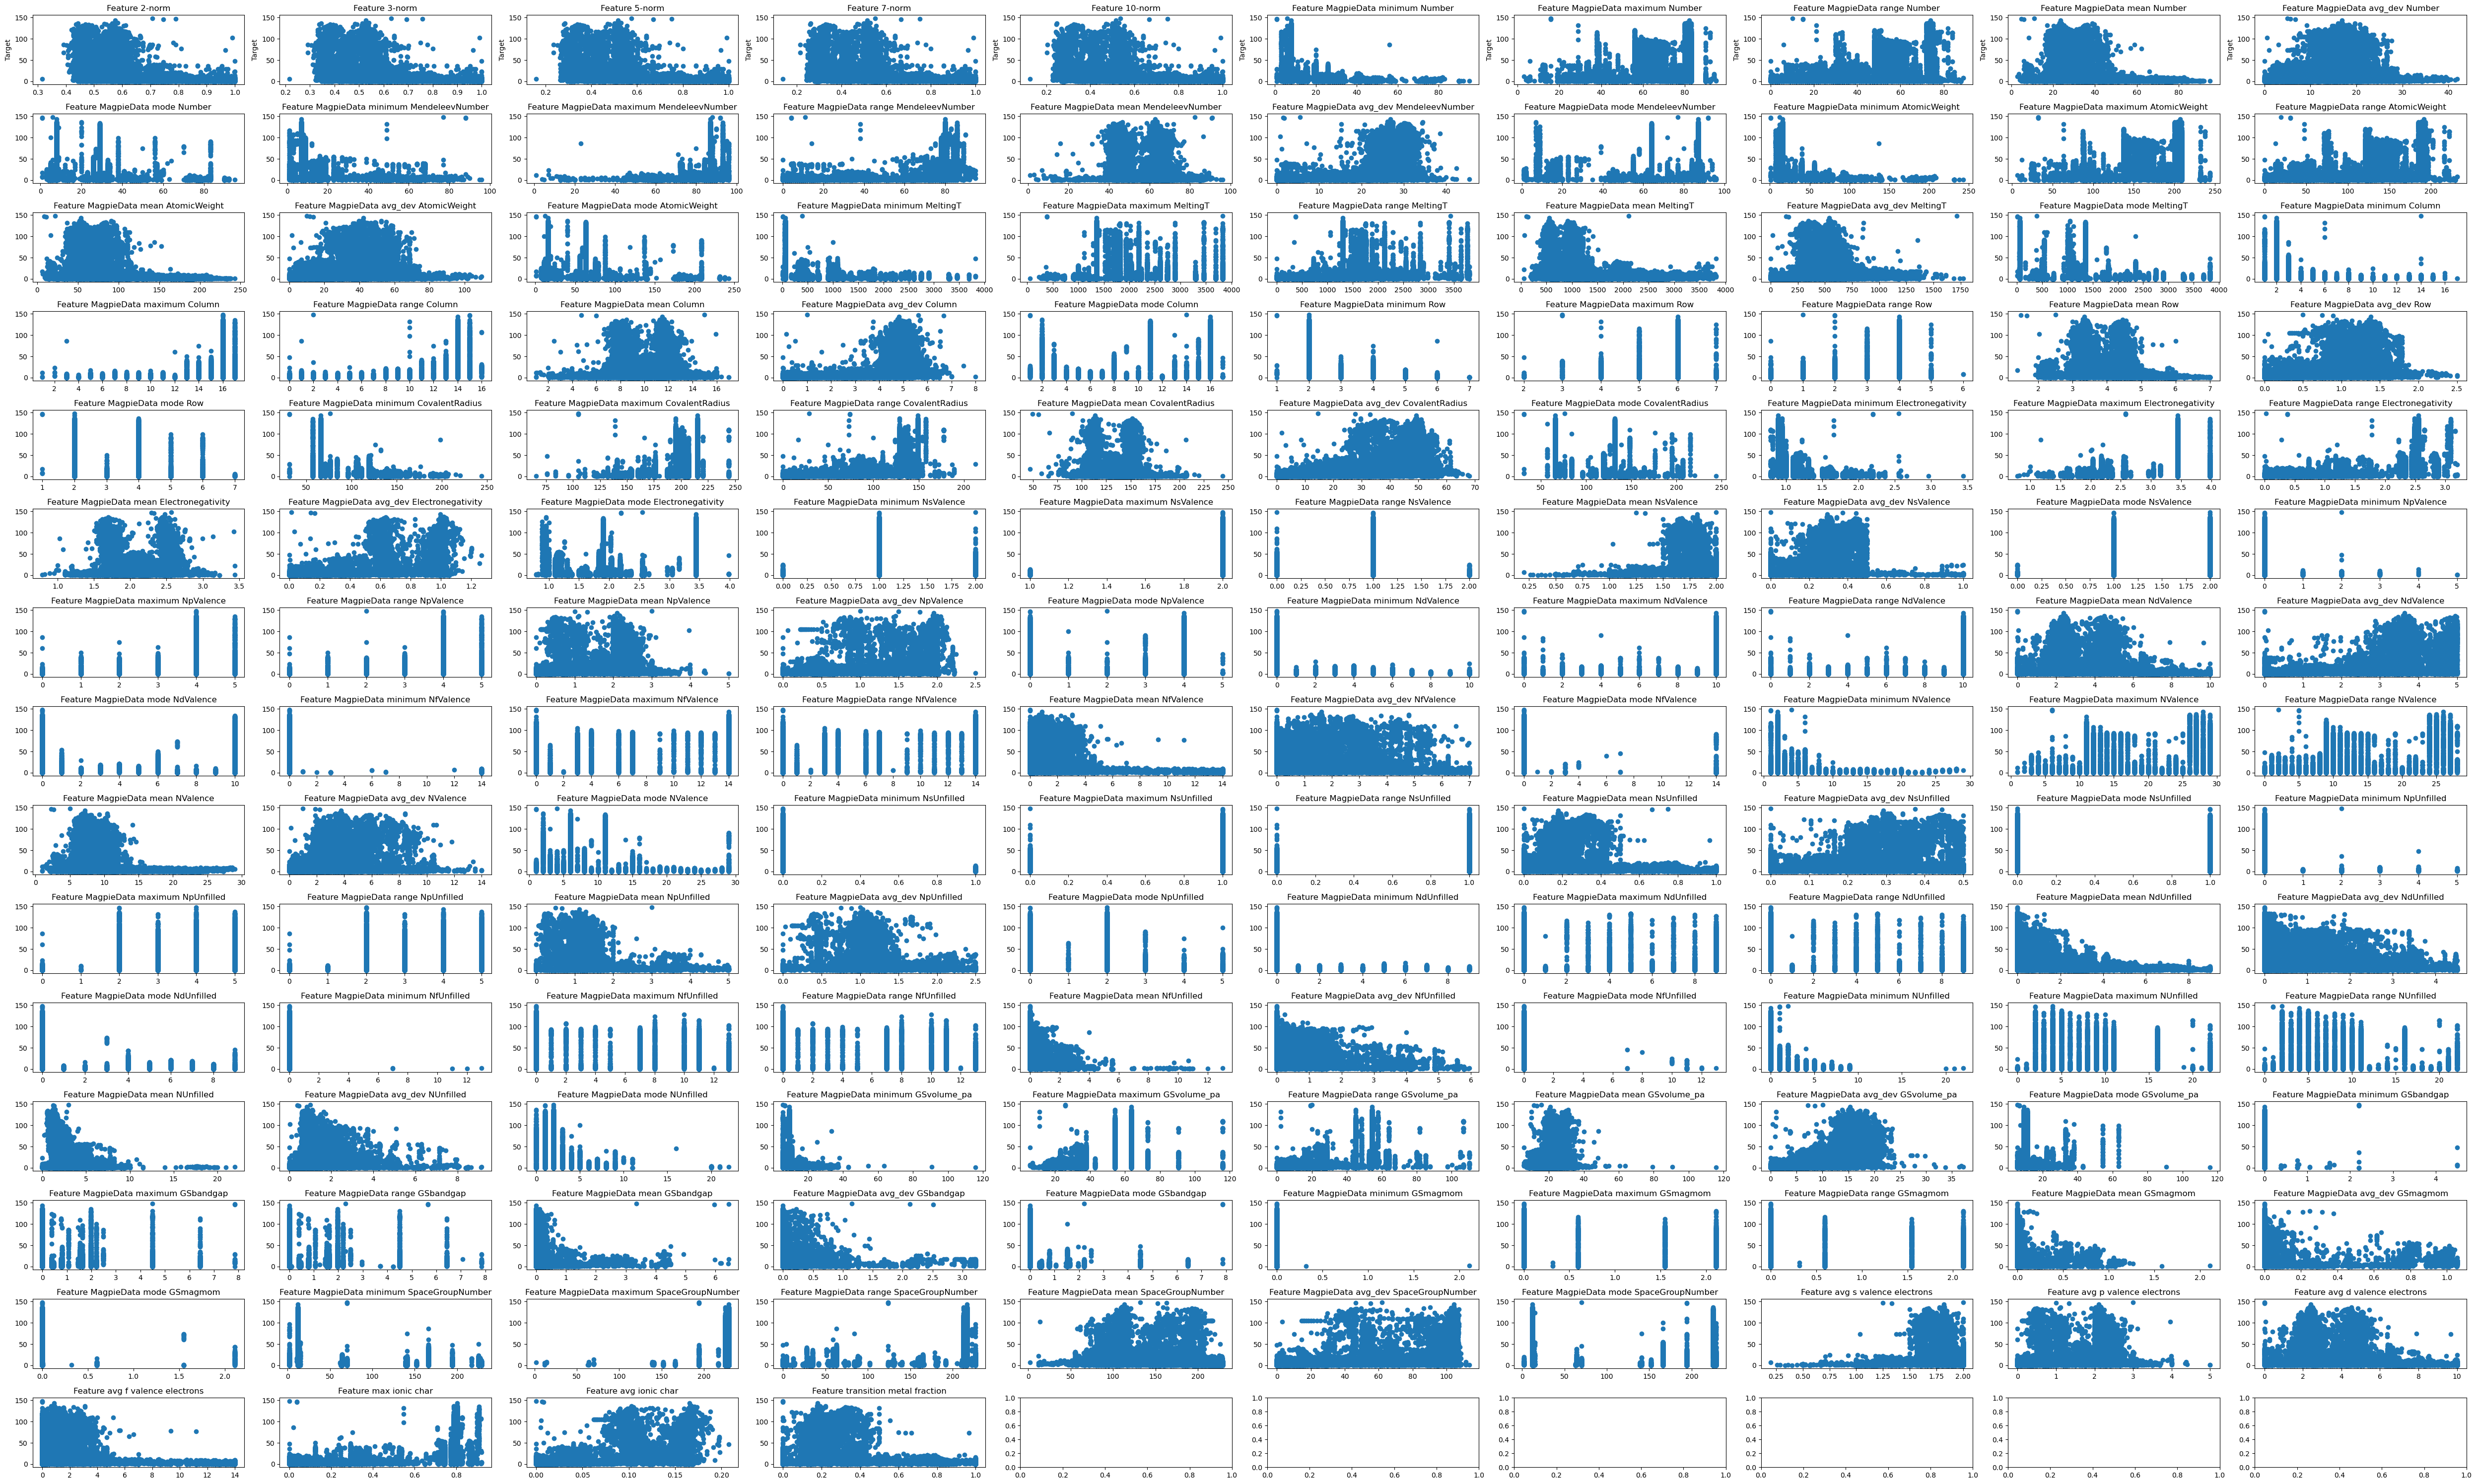

In [6]:
fig, axs = plt.subplots(15, 10, figsize=(50, 30))
count = 0 

for feature in df_filtered.drop(columns=["Tc"]).columns:
    col = count // 10
    row = count % 10  

    axs[col, row].scatter(df_filtered.drop(columns=["Tc"])[feature], df_filtered["Tc"])  
    axs[col, row].set_title(f"Feature {feature}")

    if col == 0:
        axs[col, row].set_ylabel("Target")
    if row == 14:  
        axs[col, row].set_xlabel("Feature")

    count += 1
    if count >= len(df_filtered.drop(columns=["Tc"]).columns): 
        break

plt.tight_layout()
plt.show()

Wow, that's a lot of features! A good strategy is to reduce this number using a feature selection method. Here, we’ll use Univariate Selection, which applies univariate statistical tests to evaluate the relationship between each feature and the target variable. Specifically, we’ll use the SelectKBest implementation from Scikit-learn.

In [7]:
X = df_filtered.drop(columns=["Tc"])
y = df_filtered["Tc"]

X_test, X_train, y_test, y_train = train_test_split(X,
                                                     y, 
                                                     test_size=0.9, 
                                                     random_state=1702)
y_test = np.clip(y_test, 1e-6, None)
y_train = np.clip(y_train, 1e-6, None)

In [8]:
feature_selector = SelectKBest(f_regression, k = "all")
fit = feature_selector.fit(X_train,y_train)

summary_stats = pd.DataFrame(
    {"input_variable": X.columns, 
    "p_value": fit.pvalues_, 
    "f_score": fit.scores_,
    }
)

summary_stats.sort_values(by = "p_value", inplace = True)

display(summary_stats)

significance = 0.05
score_threshold = summary_stats["f_score"].mean() # threshold for f-score

selected_variables = summary_stats.loc[(summary_stats["f_score"] >= score_threshold) &
                                       (summary_stats["p_value"] <= significance)]
print(f"The {len(selected_variables['input_variable'])} chosen features were:")
print(list(selected_variables["input_variable"]))


selected_variables = selected_variables["input_variable"].tolist()
X_train_univariate = X_train[selected_variables]

,input_variable,p_value,f_score
0,2-norm,0.000000,3761.853096
63,MagpieData avg_dev NpValence,0.000000,4844.487374
61,MagpieData range NpValence,0.000000,5523.171359
60,MagpieData maximum NpValence,0.000000,5084.344396
131,MagpieData minimum SpaceGroupNumber,0.000000,6875.900448
...,...,...,...
14,MagpieData mean MendeleevNumber,0.209205,1.577058
125,MagpieData minimum GSmagmom,0.360419,0.836483
119,MagpieData minimum GSbandgap,0.529059,0.396217
58,MagpieData mode NsValence,0.657294,0.196835


The 56 chosen features were:
['2-norm', 'MagpieData avg_dev NpValence', 'MagpieData range NpValence', 'MagpieData maximum NpValence', 'MagpieData minimum SpaceGroupNumber', 'MagpieData range SpaceGroupNumber', 'MagpieData mode Electronegativity', 'MagpieData avg_dev Electronegativity', 'MagpieData range Electronegativity', 'MagpieData maximum Electronegativity', 'MagpieData minimum Electronegativity', 'MagpieData mode CovalentRadius', 'MagpieData mean NdUnfilled', 'MagpieData range CovalentRadius', 'MagpieData range NdValence', 'MagpieData avg_dev NsUnfilled', 'MagpieData range NsUnfilled', 'MagpieData maximum NsUnfilled', 'MagpieData minimum NUnfilled', 'MagpieData mean NUnfilled', 'MagpieData mode NUnfilled', 'MagpieData maximum GSvolume_pa', 'MagpieData range GSvolume_pa', 'MagpieData avg_dev GSvolume_pa', 'MagpieData mode GSvolume_pa', 'avg ionic char', 'MagpieData avg_dev NdValence', 'MagpieData maximum CovalentRadius', 'MagpieData avg_dev CovalentRadius', 'MagpieData mode Row', '

The selection choose only 56 features. For compare the performance between the total dataset and the features selected by Univariate method, two optimizations will be made.

In [9]:
X_train_univariate

,2-norm,MagpieData avg_dev NpValence,MagpieData range NpValence,MagpieData maximum NpValence,MagpieData minimum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mode Electronegativity,MagpieData avg_dev Electronegativity,MagpieData range Electronegativity,MagpieData maximum Electronegativity,...,MagpieData mode SpaceGroupNumber,MagpieData mean MeltingT,MagpieData range Row,MagpieData minimum Row,MagpieData avg_dev Column,MagpieData mean SpaceGroupNumber,MagpieData range Column,MagpieData avg_dev SpaceGroupNumber,MagpieData maximum Column,MagpieData mode MeltingT
10257,0.493964,1.248000,5.0,5.0,12.0,182.0,2.58,0.640640,2.84,3.98,...,70.0,537.986000,4.0,2.0,4.104000,69.540000,14.0,45.672000,17.0,388.36
8394,0.755239,1.642828,4.0,4.0,12.0,217.0,3.44,0.588918,2.46,3.44,...,12.0,783.092929,3.0,2.0,4.374923,74.648536,15.0,89.123440,16.0,54.80
7550,0.647861,1.959184,4.0,4.0,12.0,213.0,3.44,1.017388,2.44,3.44,...,12.0,564.857143,4.0,2.0,5.080000,94.937857,14.0,94.786122,16.0,54.80
2975,0.599218,1.500000,3.0,3.0,166.0,63.0,2.18,0.389188,1.18,2.18,...,166.0,1285.125000,2.0,4.0,4.962500,194.287500,13.0,30.409063,15.0,1090.00
6559,0.812404,0.640000,2.0,2.0,166.0,63.0,2.55,0.364800,1.73,2.55,...,194.0,3115.485000,4.0,2.0,2.400000,194.700000,13.0,6.860000,14.0,3823.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15970,0.669992,1.991111,4.0,4.0,14.0,215.0,2.55,0.260978,1.33,2.55,...,14.0,1541.800000,1.0,4.0,5.191111,112.000000,13.0,104.533333,16.0,494.00
10948,0.453220,1.146122,4.0,4.0,12.0,217.0,0.95,0.666531,2.49,3.44,...,225.0,1054.822286,4.0,2.0,5.212245,193.250000,14.0,51.785714,16.0,1050.00
6121,0.612372,1.989796,4.0,4.0,12.0,217.0,3.44,0.971939,2.55,3.44,...,12.0,636.442500,4.0,2.0,4.477041,109.250000,14.0,104.196429,16.0,54.80
7250,0.643653,1.959184,4.0,4.0,12.0,213.0,3.44,1.018335,2.49,3.44,...,12.0,566.240000,4.0,2.0,5.085714,95.092857,14.0,94.963265,16.0,54.80


In [10]:
import sys

sys.path.append(
   r"C:\Users\julia24002\OneDrive - ILUM ESCOLA DE CIÊNCIA\Iniciação Científica\IC---Interpretable-models-for-Tc-prediction\Main_Scripts"
)

from Optimization_clustering_glm import optimization, cross_validation

In [11]:
#result = optimization(X_train, y_train)

In [12]:
study_name = "optimization_clusters_glm_teste04_08_2025_20_25_33" 

#storage_url = f"sqlite:///../Optuna_files/optimization_glm_supercon.db"
storage_url = f"sqlite:///optimization_clusters_glm_teste04_08_2025_20_25_33.db"

study_glm_sc = optuna.load_study(study_name=study_name, storage=storage_url)

In [13]:
print(f"The best trial was with RMSE equal to {study_glm_sc.best_value:.2f} and the folowing params: {study_glm_sc.best_params}")

The best trial was with RMSE equal to 16.07 and the folowing params: {'clusterer': 'bisecting_kmeans', 'n_clusters_bkmeans': 3, 'bisecting_strategy': 'biggest_inertia', 'distribution': 'gaussian', 'link_gaussian': 'identity'}


In [20]:
#result_univariate = optimization(X_train_univariate, y_train)

In [18]:
study_name = "optimization_clusters_glm_teste05_08_2025_07_18_22" 

#storage_url = f"sqlite:///../Optuna_files/optimization_glm_supercon_univariate.db"
storage_url = f"sqlite:///optimization_clusters_glm_teste05_08_2025_07_18_22.db"

study_glm_sc_univariate = optuna.load_study(study_name=study_name, storage=storage_url)

In [19]:
print(f"The best trial was with RMSE equal to {study_glm_sc_univariate.best_value:.2f} and the folowing params: {study_glm_sc_univariate.best_params}")

The best trial was with RMSE equal to 15.21 and the folowing params: {'clusterer': 'bisecting_kmeans', 'n_clusters_bkmeans': 7, 'bisecting_strategy': 'biggest_inertia', 'distribution': 'gaussian', 'link_gaussian': 'log'}


At the end, Univariate Selection led the model to a better performance!. 

### 🤔 **Conclusions**

In general, Supercon doesn´t apresented a result good as Superconductivity Data from UCI Machine Learning - with the optimization with Univariate Selection apresentating the best result (RMSE equal to 15.21 K). However, it´s interesting to notice that the two optimizations realized (with and without Univariate Selection) resulted in different params: The first one with three groups and identity as link function, and the second with seven groups and log as link function. Despite that, both of them showed a preference for bisecting k-means and gaussian Distribution. However the unsatisfactory resultt, Supercon is the most famous dataset for Tc prediction and its use is almost mandatory for all projects in this field. 